# Explore here

In [17]:
import pandas as pd

df = pd.read_csv('../data/raw/BD.csv', sep=';', encoding='latin1')

df

,Fecha Real,Maquina,Causa,Tipo,Subtipo,Familia de Producto,Turno en el que se presenta la falla,Tiempo del paro (min)
0,ene-16,L1,Cambios,Cambio de empacadora,CAMBIO PRODUCTO,ULTRAINVISIBLE RAPISEC,2,65
1,ene-16,L1,Cambios,Cambio de empacadora,CAMBIO REFERENCIA,EXTRAPROTECCIÓN,1,49
2,ene-16,L1,Cambios,Cambio de empacadora,CAMBIO REFERENCIA,EXTRAPROTECCIÓN,3,175
3,ene-16,L1,Cambios,Cambio de empacadora,CAMBIO REFERENCIA,EXTRAPROTECCIÓN,1,74
4,ene-16,L1,Cambios,Cambio de empacadora,CAMBIO REFERENCIA,ULTRAINVISIBLE RAPISEC,2,179
...,...,...,...,...,...,...,...,...
70204,mar-17,L4,Paros,Paro por reventado,AUT_10058_MOL_AUSENCIA PULPA 1,DIARIOS NORMAL,2,2
70205,mar-17,L4,Paros,Paro por reventado,AUT_10058_MOL_AUSENCIA PULPA 1,DIARIOS NORMAL,2,2
70206,mar-17,L4,Paros,Paro por reventado,AUT_10058_MOL_AUSENCIA PULPA 1,DIARIOS NORMAL,1,1
70207,mar-17,L4,PAROS POR FUERZA MAYOR,Corte de energía,NaN,DIARIOS NORMAL,2,134


In [18]:
#Para revisar en qué columnas yo tengo un valor nulo
for column in df.columns:
    nulls = df[column].isnull().sum()
    if nulls > 0:
        print(column)

print('tengo nulos en todas estas columnas')

Subtipo
tengo nulos en todas estas columnas


In [19]:
#Ahora a borrar filas con nulos:
df = df.dropna()
df


,Fecha Real,Maquina,Causa,Tipo,Subtipo,Familia de Producto,Turno en el que se presenta la falla,Tiempo del paro (min)
0,ene-16,L1,Cambios,Cambio de empacadora,CAMBIO PRODUCTO,ULTRAINVISIBLE RAPISEC,2,65
1,ene-16,L1,Cambios,Cambio de empacadora,CAMBIO REFERENCIA,EXTRAPROTECCIÓN,1,49
2,ene-16,L1,Cambios,Cambio de empacadora,CAMBIO REFERENCIA,EXTRAPROTECCIÓN,3,175
3,ene-16,L1,Cambios,Cambio de empacadora,CAMBIO REFERENCIA,EXTRAPROTECCIÓN,1,74
4,ene-16,L1,Cambios,Cambio de empacadora,CAMBIO REFERENCIA,ULTRAINVISIBLE RAPISEC,2,179
...,...,...,...,...,...,...,...,...
70202,mar-17,L4,Paros,Paro por reventado,AUT_10043_MPR_FALTA TRIM LADO DR,DIARIOS NORMAL,1,2
70203,mar-17,L4,Paros,Paro por reventado,AUT_10043_MPR_FALTA TRIM LADO DR,DIARIOS NORMAL,2,5
70204,mar-17,L4,Paros,Paro por reventado,AUT_10058_MOL_AUSENCIA PULPA 1,DIARIOS NORMAL,2,2
70205,mar-17,L4,Paros,Paro por reventado,AUT_10058_MOL_AUSENCIA PULPA 1,DIARIOS NORMAL,2,2


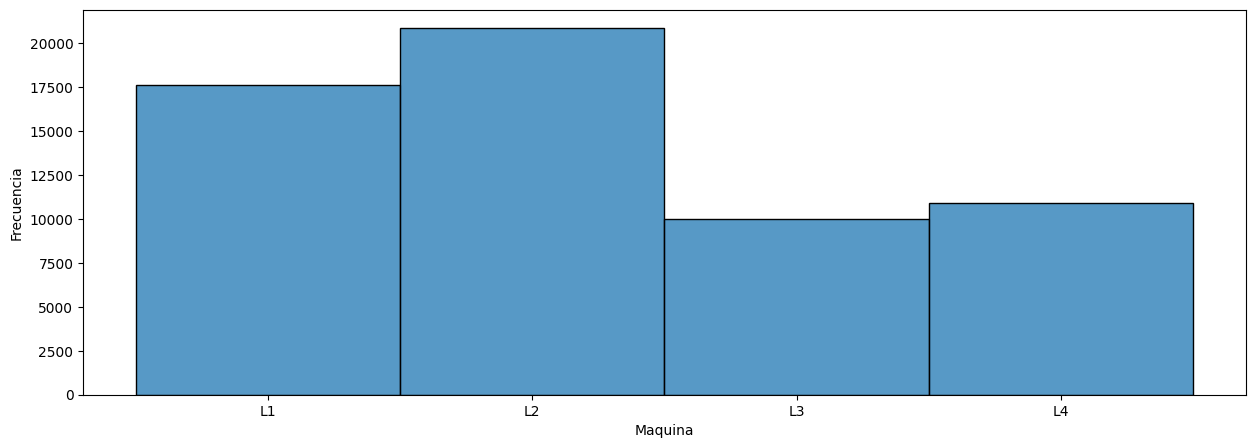

La máquina que presenta más desviaciones es la 2, luego la 1, luego la 4 y por último la 3


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, figsize=(15, 5))

sns.histplot(df['Maquina'], ax=axis).set(ylabel='Frecuencia')
plt.show()

print('La máquina que presenta más desviaciones es la 2, luego la 1, luego la 4 y por último la 3')

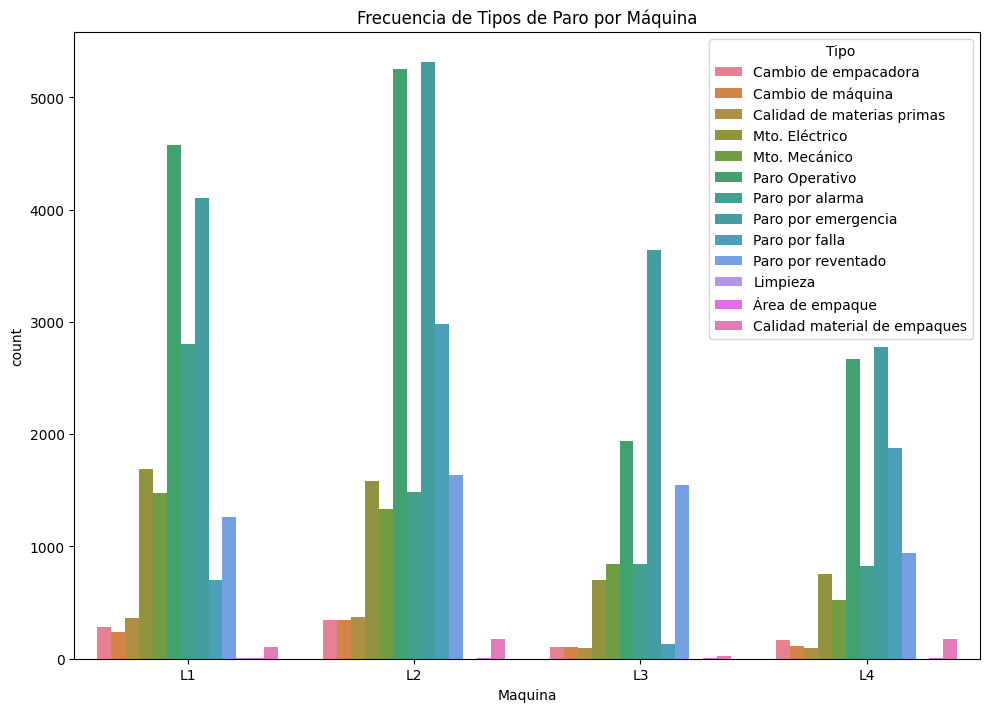

Las paradas se dan en su mayoría por paro por emergencia


In [57]:
#Análisis categórico - categórico

fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(data=df, x='Maquina', hue='Tipo')
#voy a cambiar el color de las barras
palette = sns.color_palette("Set2", n_colors=len(df['Tipo'].unique()))
plt.tight_layout()
plt.title('Frecuencia de Tipos de Paro por Máquina')
plt.show()
print('Las paradas se dan en su mayoría por paro por emergencia')

In [54]:
#ahora quiero ver en qué tipo de falla se ha ido más tiempo de paro
df.groupby('Tipo')['Tiempo del paro (min)'].sum().sort_values(ascending=False)

#'se evidencia visualmente que paro operativo y paro por emergencia son los tipos de fallas más frecuentes, pero al revisar el tiempo de paro, se encuentra algo distinto')

Tipo
Paro Operativo                  186806
Mto. Mecánico                   132824
Mto. Eléctrico                   99186
Cambio de máquina                40695
Paro por emergencia              38760
Cambio de empacadora             31589
Paro por alarma                  27585
Calidad de materias primas       14550
Calidad material de empaques     11891
Paro por reventado               11684
Paro por falla                    7333
Área de empaque                   1017
Limpieza                             4
Name: Tiempo del paro (min), dtype: int64

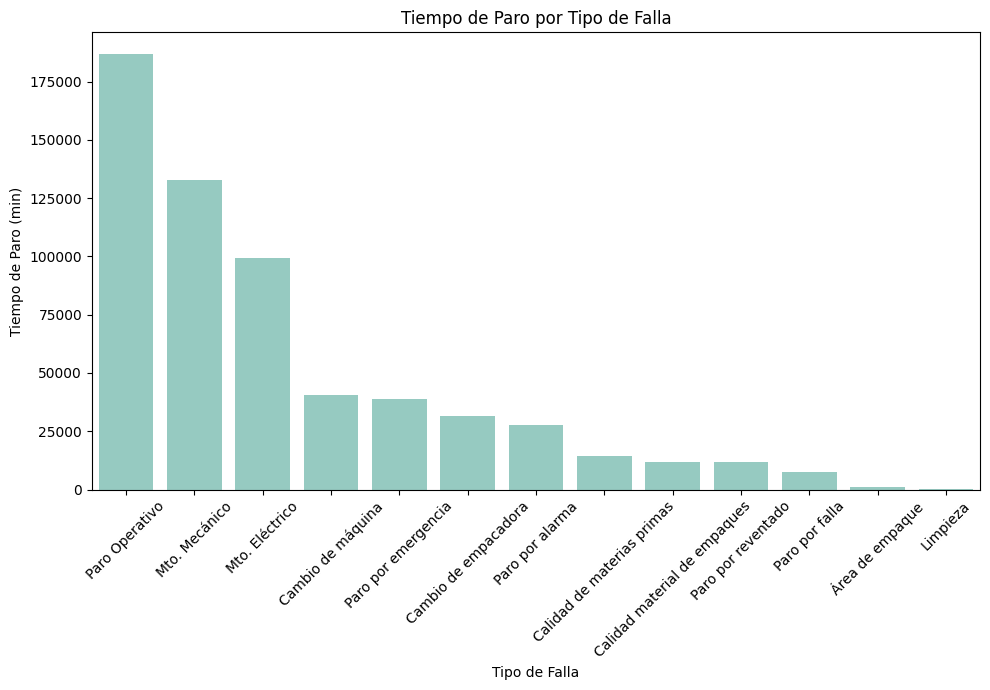

In [56]:
#ahora quiero graficar esos tiempos de paro por tipo de falla ordenado de mayor a menor
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x=df.groupby('Tipo')['Tiempo del paro (min)'].sum().sort_values(ascending=False).index, 
            y=df.groupby('Tipo')['Tiempo del paro (min)'].sum().sort_values(ascending=False).values, ax=ax)
ax.set_xlabel('Tipo de Falla')
ax.set_ylabel('Tiempo de Paro (min)')
ax.set_title('Tiempo de Paro por Tipo de Falla')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

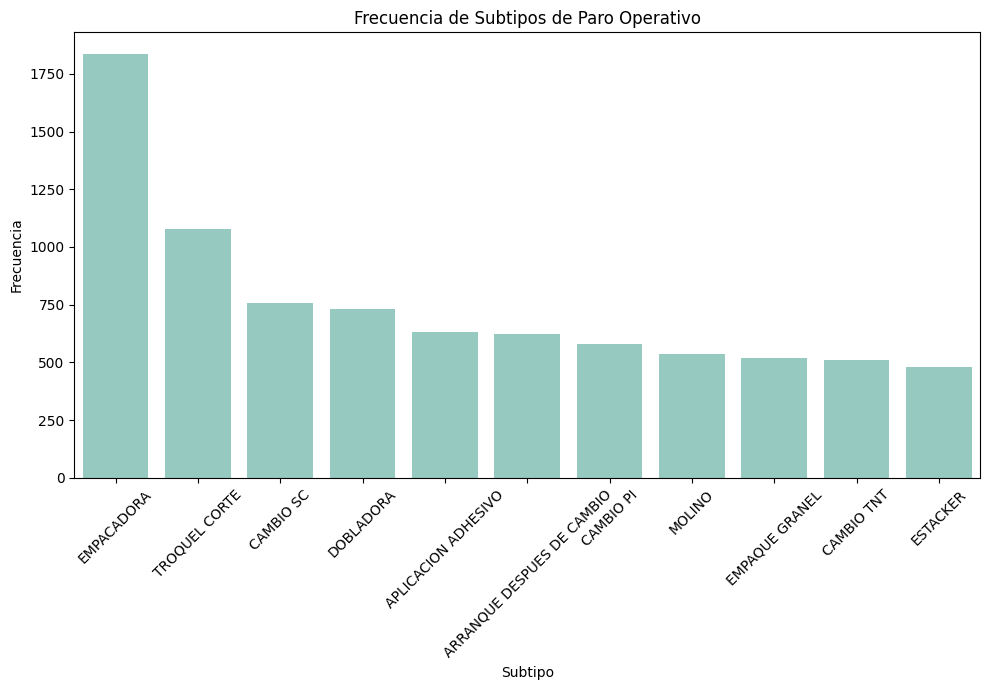

Los top offenders en paro operativo se evidencian en este gráfico


In [ ]:
#Ahora, sólo tomando la columna Tipo, los valores que tengan "Paro operativo", quiero ver qué valor tienen en la columna Subtipo
df[df['Tipo'] == 'Paro Operativo']['Subtipo'].value_counts()
#Ahora haré un histograma con los subtipos de paro por emergencia pero sólo con los que tienen más de 100 ocurrencias
subtipo_counts = df[df['Tipo'] == 'Paro Operativo']['Subtipo'].value_counts()
subtipo_counts = subtipo_counts[subtipo_counts > 450]
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x=subtipo_counts.index, y=subtipo_counts.values, ax=ax)
ax.set_xlabel('Subtipo')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia de Subtipos de Paro Operativo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print('Los top offenders en paro operativo se evidencian en este gráfico')


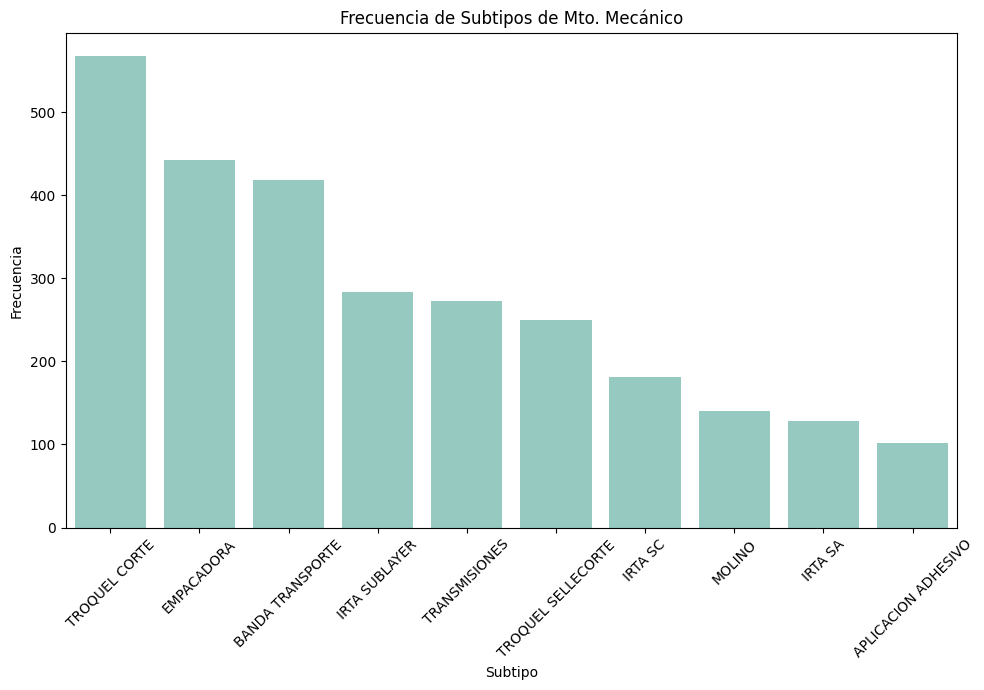

Los top offenders en Mto. Mecánico se evidencian en este gráfico


In [62]:
#Ahora, sólo tomando la columna Tipo, los valores que tengan "Paro Mto mecánico", quiero ver qué valor tienen en la columna Subtipo
df[df['Tipo'] == 'Mto. Eléctrico']['Subtipo'].value_counts()
#Ahora haré un histograma con los subtipos de paro por emergencia pero sólo con los que tienen más de 100 ocurrencias
subtipo_counts = df[df['Tipo'] == 'Mto. Mecánico']['Subtipo'].value_counts()
subtipo_counts = subtipo_counts[subtipo_counts > 100]
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x=subtipo_counts.index, y=subtipo_counts.values, ax=ax)
ax.set_xlabel('Subtipo')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia de Subtipos de Mto. Mecánico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print('Los top offenders en Mto. Mecánico se evidencian en este gráfico')

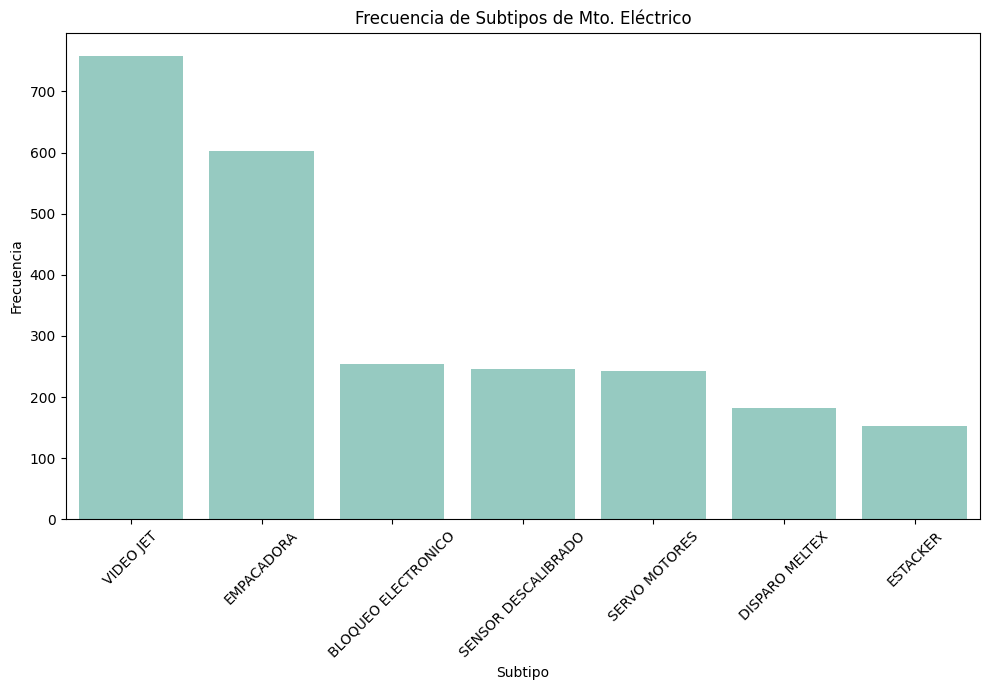

Los top offenders en Mto. Eléctrico se evidencian en este gráfico


In [65]:
#Ahora, sólo tomando la columna Tipo, los valores que tengan "Paro Mto eléctrico", quiero ver qué valor tienen en la columna Subtipo
df[df['Tipo'] == 'Mto. Eléctrico']['Subtipo'].value_counts()
#Ahora haré un histograma con los subtipos de paro por emergencia pero sólo con los que tienen más de 100 ocurrencias
subtipo_counts = df[df['Tipo'] == 'Mto. Eléctrico']['Subtipo'].value_counts()
subtipo_counts = subtipo_counts[subtipo_counts > 150]
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x=subtipo_counts.index, y=subtipo_counts.values, ax=ax)
ax.set_xlabel('Subtipo')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia de Subtipos de Mto. Eléctrico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print('Los top offenders en Mto. Eléctrico se evidencian en este gráfico')